# Medical Cost Personal Insurance Project

Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns   

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. nregion: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance

### Predict : Can you accurately predict insurance costs?

Dataset Link-

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 3 types of data types are present Int64, object and float64

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no nulls values present in dataset.

In [6]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Convert Sex, smoker and region into interger using encoding.

In [7]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


<Axes: >

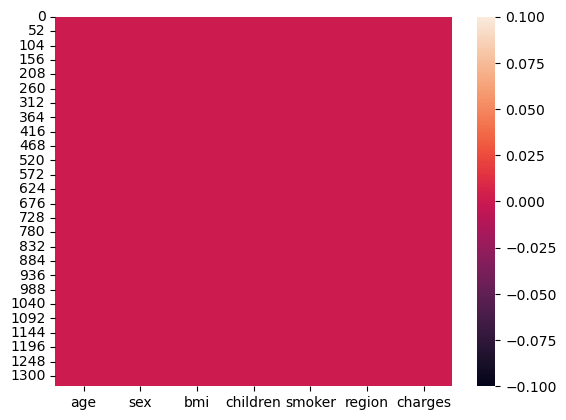

In [9]:
sns.heatmap(df.isna())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Now only two types od data type present int64 and float64

In [11]:
df.nunique().to_frame("NO. of unique values")

,NO. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [12]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Data Visualization

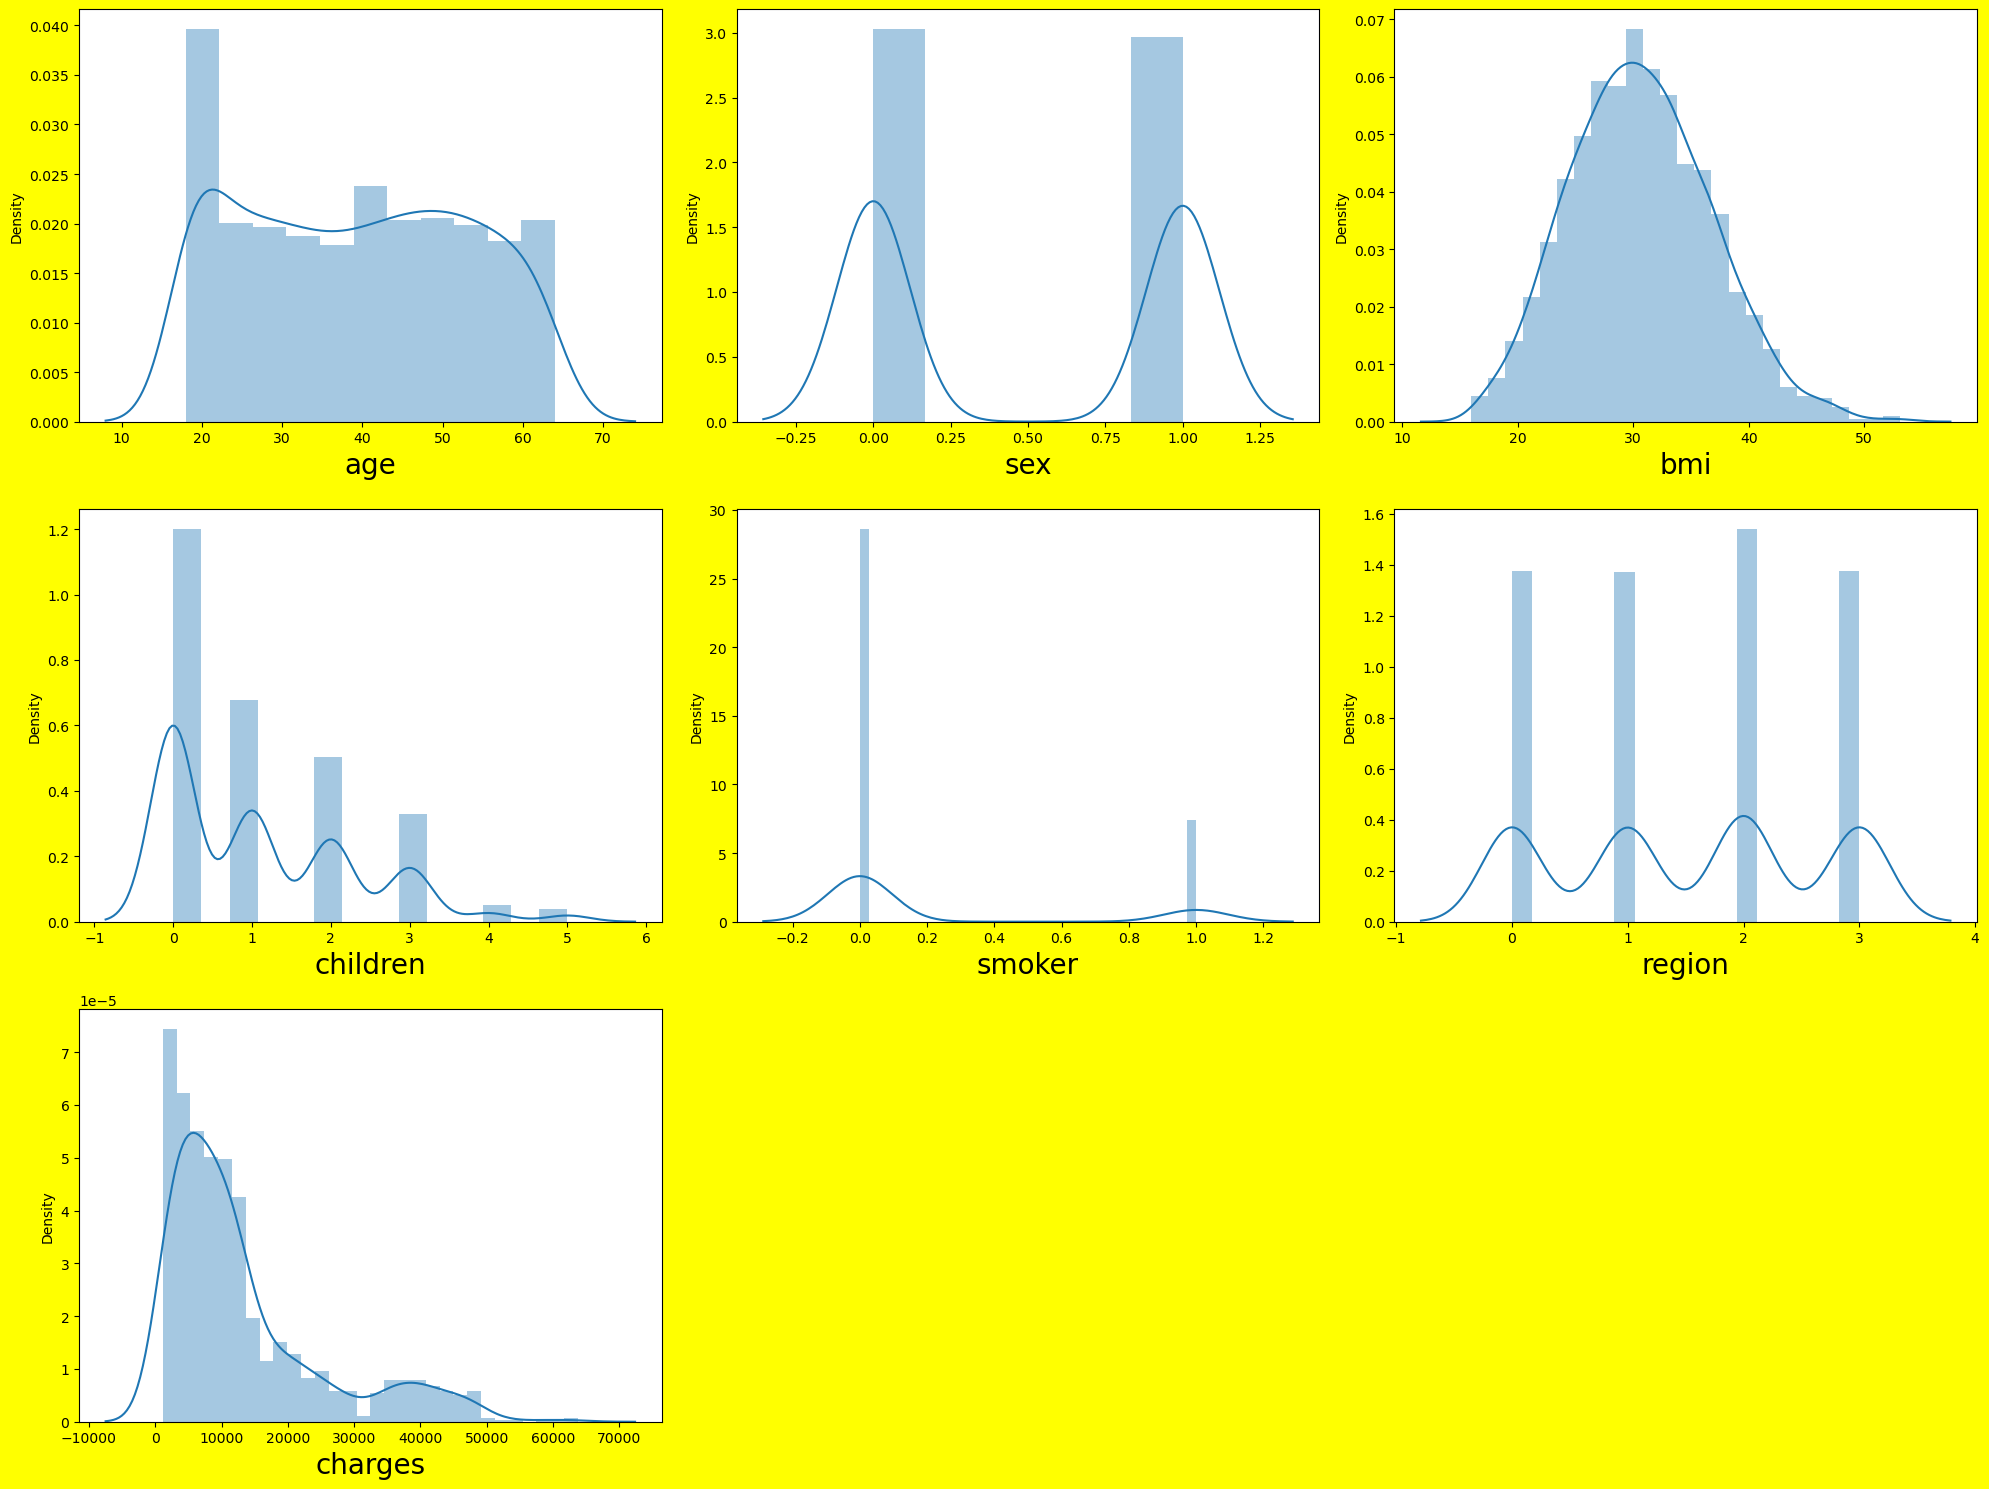

In [13]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

In [14]:
df_features = df.drop('charges', axis=1)

## check outliers 

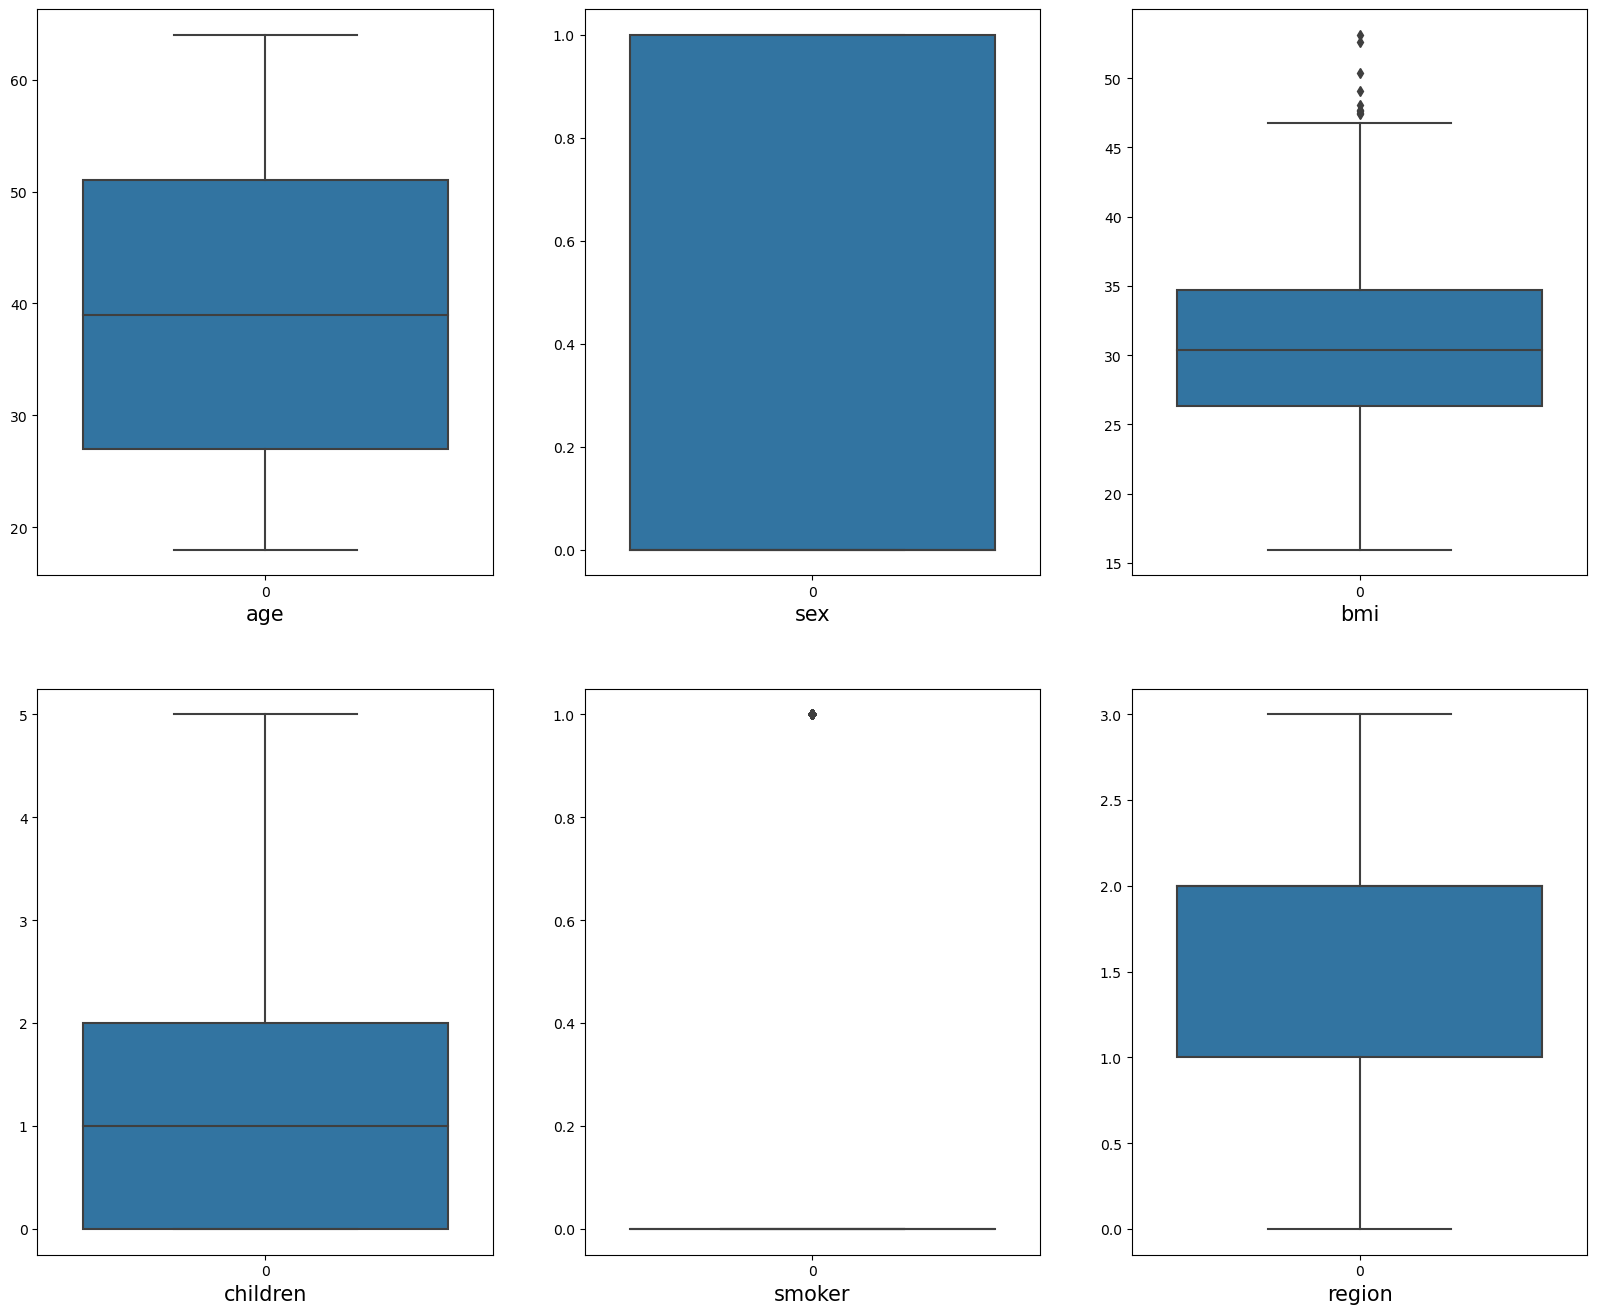

In [15]:
# visualize the outliers using boxplot

plt.figure(figsize =(20,25))
graph = 1

for column in df_features:
    if graph <=7:
        plt.subplot(3,3,graph)
        ax = sns.boxplot(data= df_features[column])
        plt.xlabel(column, fontsize=15)
    graph +=1
plt.show()

In [16]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.037853
charges     1.515880
dtype: float64

bmi and smoker have skewness.

In [17]:
# Removing outliers using zscore method


from scipy.stats import zscore

z=np.abs(zscore(df))
z
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [18]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1309, 7)

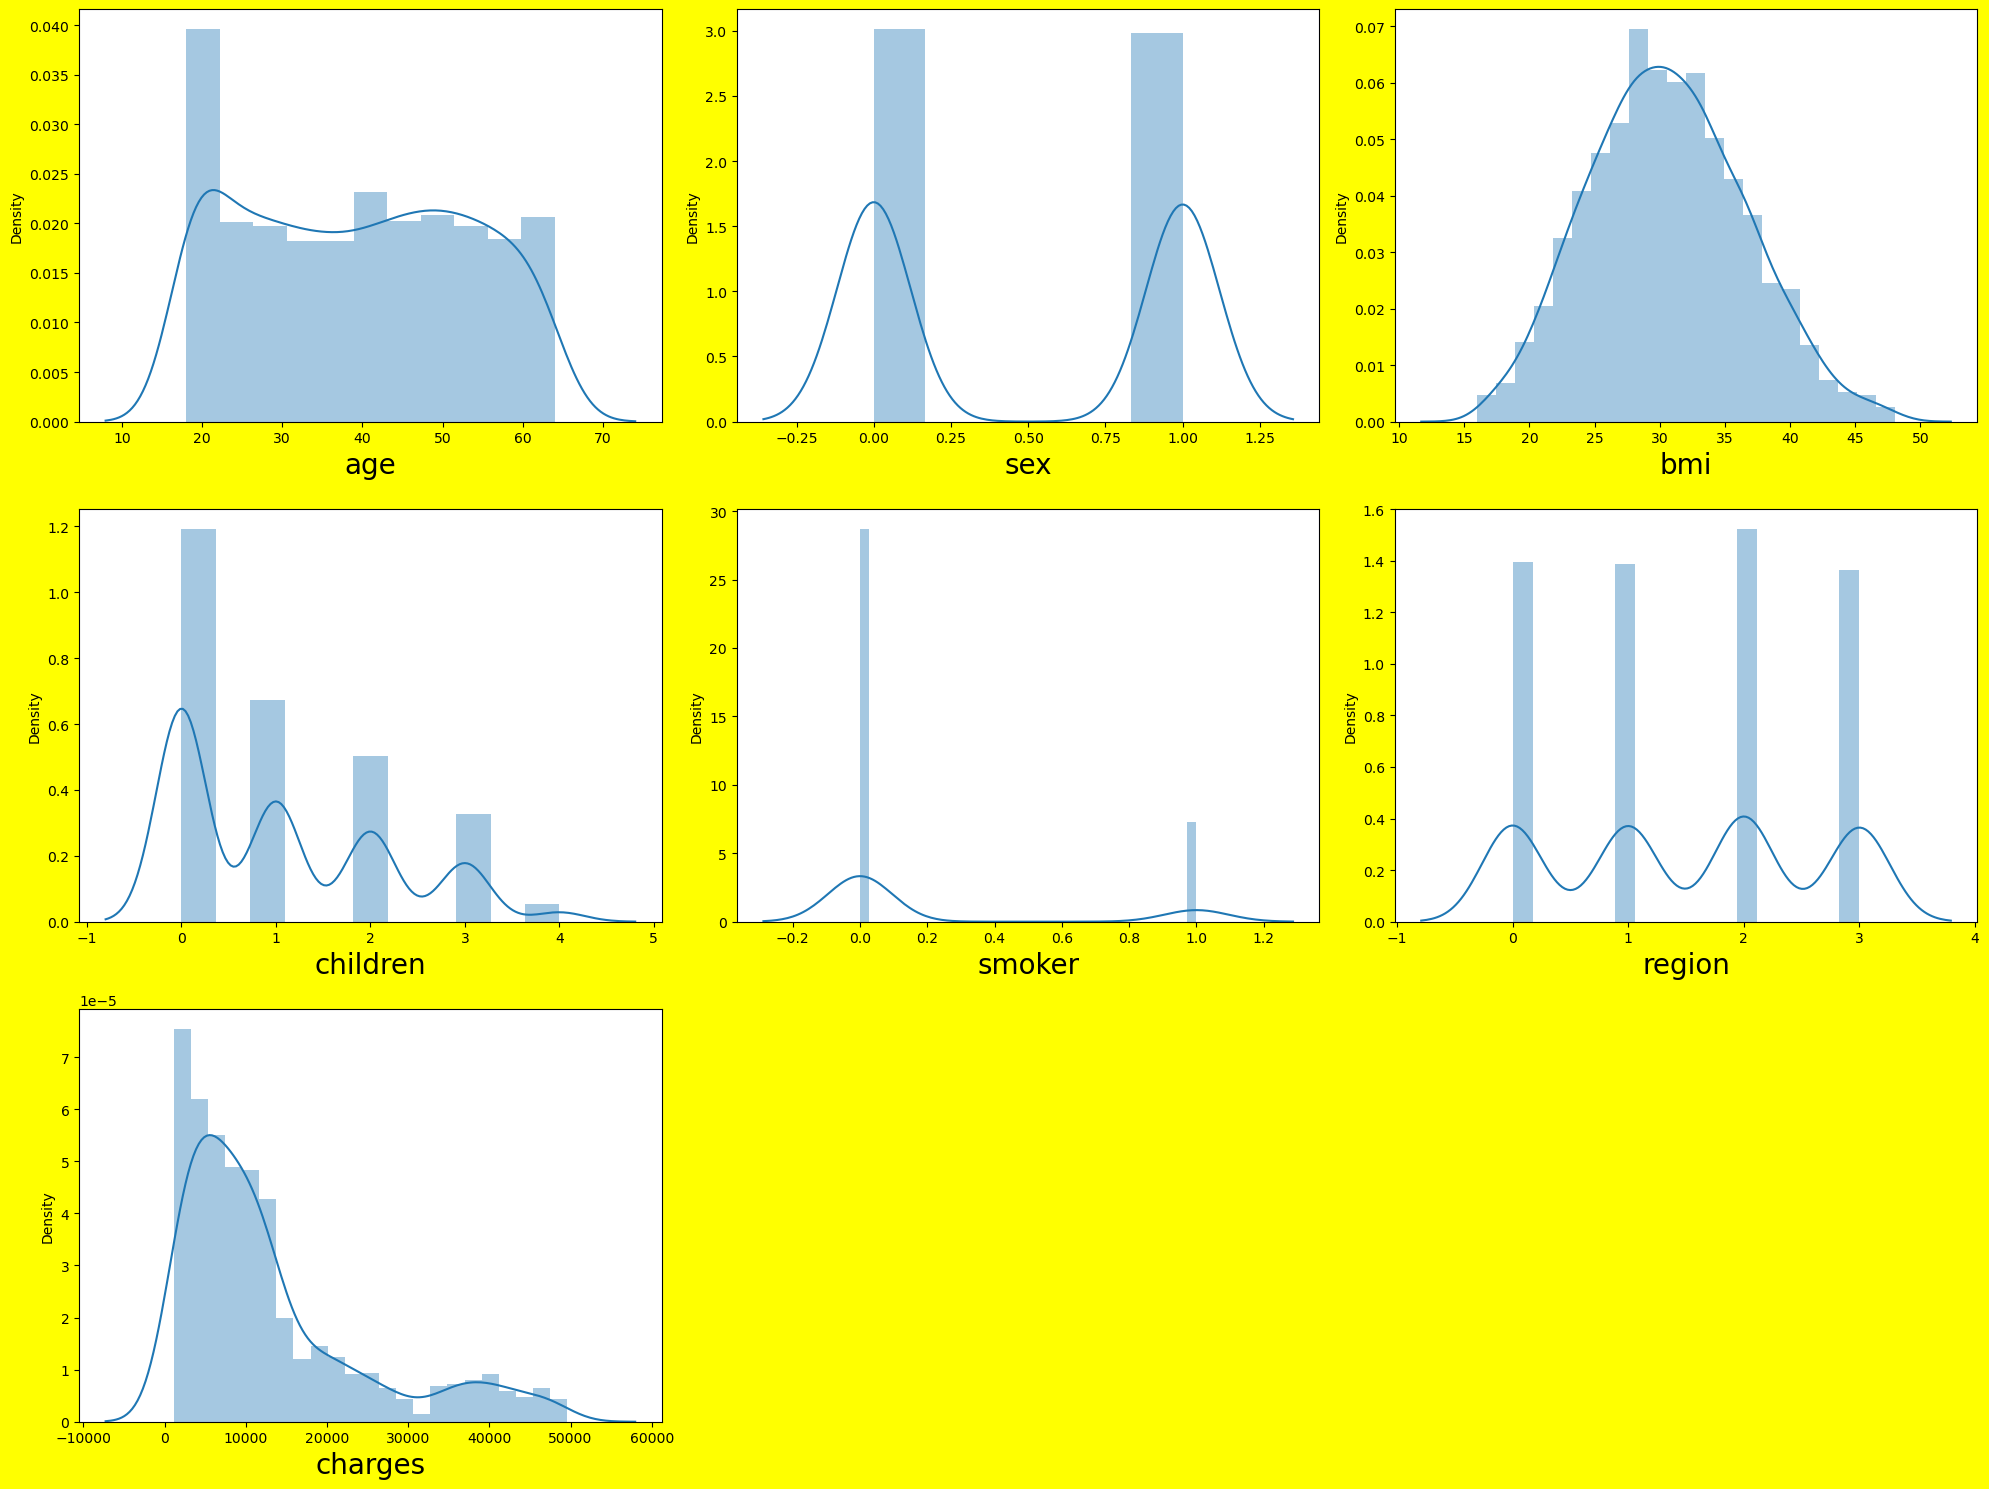

In [19]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df_new:
    if plotnumber <= 7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

### now no outliers are present

In [20]:
df_new.skew()

age         0.051340
sex         0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.022504
charges     1.437160
dtype: float64

In [21]:
x = df_new.drop(['charges'],axis=1)
y = df_new ['charges']

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

,age,sex,bmi,children,smoker,region
0,-1.439063,1.005362,-0.449359,-0.929616,1.984848,1.352435
1,-1.510086,-0.994667,0.533391,-0.040093,-0.503817,0.448279
2,-0.799859,-0.994667,0.404478,1.738954,-0.503817,0.448279
3,-0.444746,-0.994667,-1.319101,-0.929616,-0.503817,-1.360033
4,-0.515769,-0.994667,-0.285288,-0.929616,-0.503817,-1.360033
...,...,...,...,...,...,...
1304,0.762639,-0.994667,0.064617,1.738954,-0.503817,-1.360033
1305,-1.510086,1.005362,0.223666,-0.929616,-0.503817,-0.455877
1306,-1.510086,1.005362,1.049041,-0.929616,-0.503817,0.448279
1307,-1.297018,1.005362,-0.800939,-0.929616,-0.503817,1.352435


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=348)

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
lr.score(x_train, y_train)

0.7623603326828503

In [27]:
lr.score(x_test, y_test)

0.718182443897777

In [28]:
y_pred = lr.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
y_pred = lr.predict(x_test)

print(mean_absolute_error(y_test, y_pred))              ##MAE

print(mean_squared_error(y_test, y_pred))               ##MSE

print(np.sqrt(mean_squared_error(y_test, y_pred)))      ## RMSE

4457.8183354508765
40010811.35663072
6325.409975379518


In [31]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [32]:
lasscv = LassoCV (alphas = None, max_iter = 10)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [33]:
# best alpha parameter

alpha = lasscv.alpha_
alpha

36.43195684944996

In [34]:
lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train, y_train)

Lasso(alpha=36.43195684944996)

In [35]:
lasso_reg.score(x_test, y_test)

0.7177924775367039

### 71.77% using liner regression model

In [36]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,x,y,cv=5,).mean())

0.7459823607579326
0.7785965872519239
0.7503598582660594


In [40]:
from sklearn.metrics import r2_score
svr=SVR()

svr.fit(xtrain,ytrain)

ypredtrain1=svr.predict(xtrain)
ypredtest1=svr.predict(xtest)

print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svr,x,y,cv=5,).mean())

-0.08883141398867411
-0.10736700538918442
-0.09694434951566966


In [41]:
# using RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

rf.fit(xtrain,ytrain)

ypredtrain2 = rf.predict(xtrain)
ypredtest2 = rf.predict(xtest)

print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rf,x,y,cv=5,).mean())


# hyperparameter tunning
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators':[20,30,45,70,90,120,150]}

grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)

grid.fit(xtrain,ytrain)

print(grid.best_params_)



# model after tunning parameters
rf = RandomForestRegressor(random_state=42,n_estimators=120)
rf.fit(xtrain,ytrain)
ypredtrain2 = rf.predict(xtrain)
ypredtest2 = rf.predict(xtest)

print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rf,x,y,cv=5,).mean())

0.9739787269113812
0.8697932506266428
0.8344514616508668
{'n_estimators': 120}
0.9740302171452017
0.8703422254815909
0.8347211458515333


In [42]:
# use GradientBoostingRegressor model
GB=GradientBoostingRegressor()
GB.fit(xtrain,ytrain)

ypredtrain3=GB.predict(xtrain)
ypredtest3=GB.predict(xtest)

print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(GB,x,y,cv=5,).mean())


# hyperparameter tunning
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}

grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)

print(grid.best_params_)


# model after tunning parameters
GB = GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
GB.fit(xtrain,ytrain)
ypredtrain3=GB.predict(xtrain)
ypredtest3=GB.predict(xtest)

print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(GB,x,y,cv=5,).mean())

0.8967755616865393
0.8939847380410157
0.854173059461482
{'learning_rate': 0.19, 'n_estimators': 21}
0.8720500254665778
0.8945760455133185
0.8593632941591188


In [43]:
# use XGBRegressor model
final = XGBRegressor()
final.fit(xtrain,ytrain)

ypredtrain4 =final.predict(xtrain)
ypredtest4=final.predict(xtest)

print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(final,x,y,cv=5,).mean())


# hyperparameter tunning
from sklearn.model_selection import GridSearchCV
estimator = XGBRegressor()
param_grid = {'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)


# model after tunning parameters
final = XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
final.fit(xtrain,ytrain)

ypredtrain4 = final.predict(xtrain)
ypredtest4 = final.predict(xtest)

print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(final,x,y,cv=5,).mean())

0.9945918852305387
0.8294959212267898
0.8083018721471962
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8740892540567695
0.895198437596458
0.8609758991948612


In [45]:
from pickle import dump
dump(final,open('healthinsurance.pkl','wb'))

In [53]:
import pickle
loaded_model = pickle.load(open('healthinsurance.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

87.28506694727558


In [54]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,327
Predicted,11244.008789,3007.667969,7195.429688,3190.731689,3954.647461,3190.731689,6166.412109,35119.960938,7165.580566,35708.042969,...,35064.851562,18120.03125,12016.211914,20198.166016,5420.643555,11539.588867,3583.640381,6718.865234,9810.811523,9523.875977
Original,28340.188850,1708.925750,7151.092000,16586.497710,2261.568800,1674.632300,4837.582300,34303.167200,6334.343550,44585.455870,...,34806.467700,17081.08000,11534.872650,19199.944000,4239.892650,25333.332840,3260.199000,6358.776450,8280.622700,7731.427100
